### FFT

This Fourier transform outputs vibration amplitude as a function of frequency so that the analyzer can understand what is causing the vibration.  

The frequency resolution in an FFT is directly proportional to the signal length and sample rate. [3]

### Spectrogram
A spectrogram takes a series of FFTs and overlaps them to illustrate how the spectrum (frequency domain) changes with time.  [3]

### PSD
A power spectral density (PSD) takes the amplitude of the FFT, multiplies it by its complex conjugate and normalizes it to the frequency bin width.  

This allows for accurate comparison of random vibration signals that have different signal lengths.  [3]


#### Notes
wave length is length of one cycle. distance/number of cycles

amplitude is median value fo  highest and lowest y values in a cycle

period = time/number of cycles  --> T
frequency = number of cycles / time  --> 1/T --> 1/s --> s^-1 --> Hz 
i.e freq is number of cycles in a second.   [1]


**Relationships**

wave length inc & freq dec & period inc & Energy dec

wavelength ~ period  (directly related)

freq ~ Energy (directly related)  [1]

#### Small example

In [72]:
period = 0.25
freq = 1/0.25
freq # --> 4 cycles in a second --> 4 Hz

4.0

In [73]:
import matplotlib.pyplot as plt
import numpy as np

## Example 1 -FFT  [4]

In [74]:
sampling_freq = 100  # time points
sampling_interval = 1/sampling_freq
begin_time = 0
end_time = 10

signal_1_freq = 2
signal_2_freq = 3

time = np.arange(begin_time, end_time, sampling_interval)
print(time[:10])


[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09]


In [75]:
# create sin waves
wave1 = np.sin(2*np.pi*signal_1_freq*time)
wave2 = np.sin(2*np.pi*signal_2_freq*time)

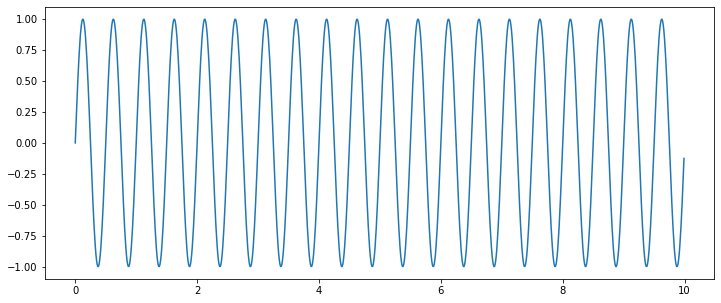

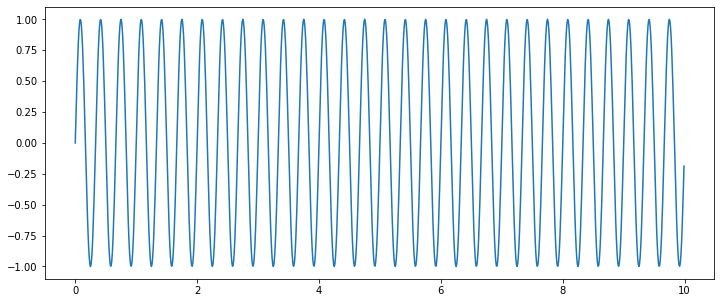

In [76]:
plt.figure(figsize=(12,5))
plt.plot(time, wave1)

plt.figure(figsize=(12,5))
plt.plot(time, wave2)
plt.show()

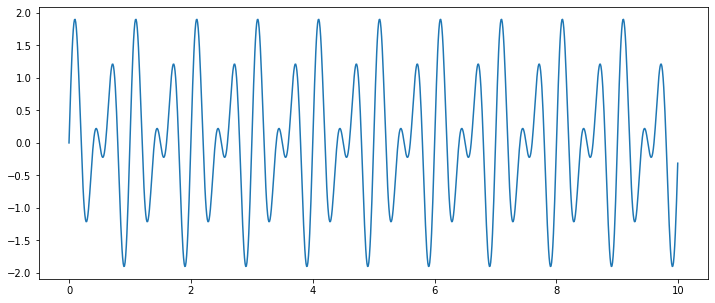

In [77]:
# Add the sine waves

wave = wave1 + wave2
plt.figure(figsize=(12,5))
plt.plot(time, wave)
plt.show()

In [78]:
# Frequency domain representation

fourierTransform = np.fft.fft(wave)/len(wave)           # Normalize amplitude
fourierTransform = fourierTransform[range(int(len(wave)/2))] # Exclude sampling frequency

 

tpCount     = len(wave)
values      = np.arange(int(tpCount/2))
timePeriod  = tpCount/sampling_freq
frequencies = values/timePeriod

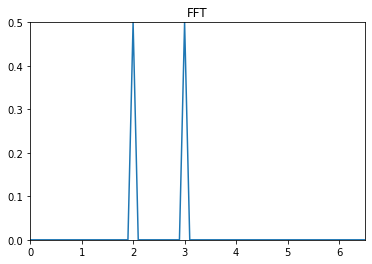

In [79]:
plt.figure(2)
plt.title('FFT')
plt.plot(frequencies, abs(fourierTransform))
plt.axis([0, 6.5, 0, 0.5])
plt.show()

## Example 2 - Waves - FFT - PSD  [2]

In [80]:
n = 1000  # number of points
Lx = 100  # time period

x = np.linspace(0,Lx,n)

print(x[:10])

[0.        0.1001001 0.2002002 0.3003003 0.4004004 0.5005005 0.6006006
 0.7007007 0.8008008 0.9009009]


[1.         0.99998022 0.99992089 0.999822   0.99968356 0.99950557
 0.99928805 0.999031   0.99873443 0.99839835]


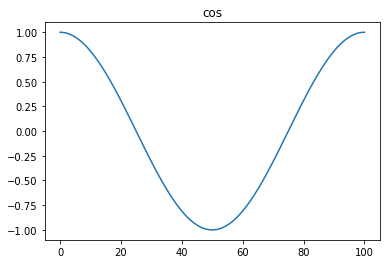

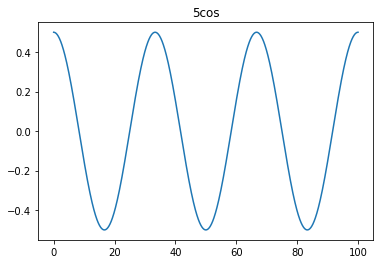

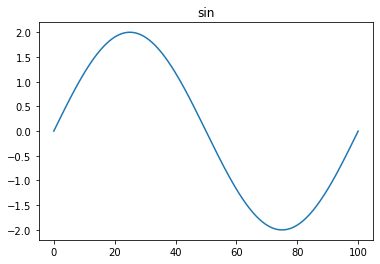

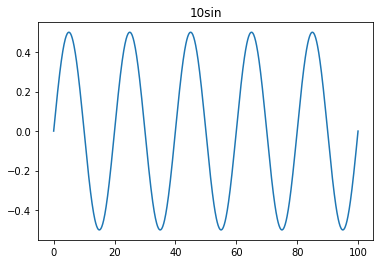

In [81]:
y1 = 1*np.cos((2*np.pi/Lx)*x)   # 1 is amplitude, 1 wave 
y2 = 2*np.sin((2*np.pi/Lx)*x)   # 2 is amplitude, 1 wave 
y3 = 0.5*np.cos(3*(2*np.pi/Lx)*x)   # 0.5 is amplitude, 3 waves 
y4 = 0.5*np.sin(5*(2*np.pi/Lx)*x)   # 0.5 is amplitude, 5 waves

print(y1[:10])
plt.plot(x,y1)
plt.title('cos')
plt.show()

plt.plot(x,y3)
plt.title('5cos')
plt.show()


plt.plot(x,y2)
plt.title('sin')
plt.show()

plt.plot(x,y4)
plt.title('10sin')
plt.show()

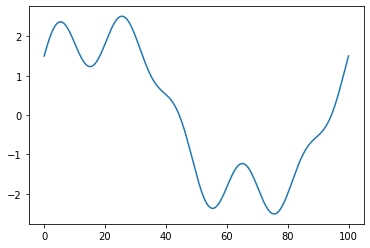

In [82]:
y = y1 + y2 + y3 + y4
plt.plot(x,y)
plt.show()

In [83]:
freqs = np.fft.fftfreq(n)
fft_vals = np.fft.fft(y) # FFT values
fft_theo = 2*np.abs(fft_vals/n)  # True FFT

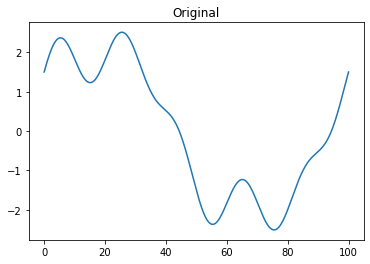

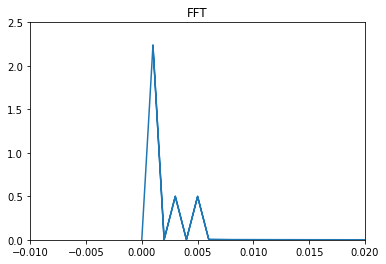

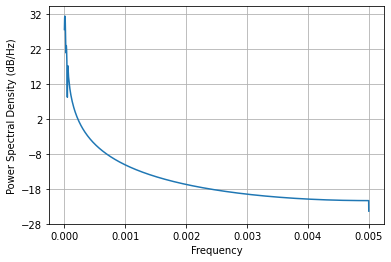

In [84]:
plt.figure(1)
plt.title('Original')
plt.plot(x,y)

plt.figure(2)
plt.title('FFT')
plt.plot(abs(freqs), abs(fft_theo))
plt.axis([-0.01, 0.02, 0, 2.5])
plt.show()


plt.psd(y, 5000, 1 / sampling_freq)
plt.show()

## Example 3  - PSD  [5]

In [85]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec

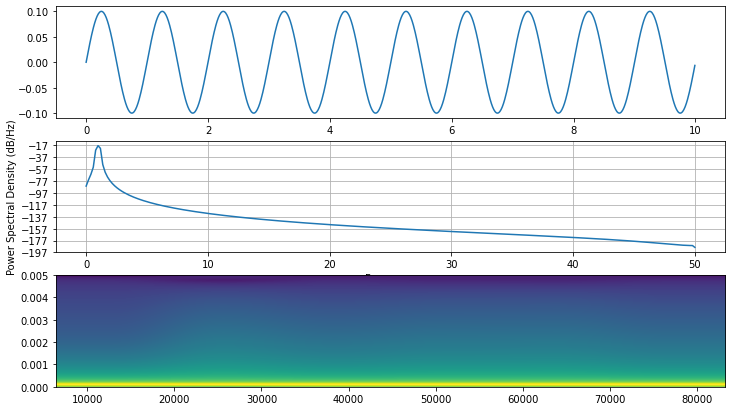

In [86]:
sampling_freq = 0.01
begin_time = 0
end_time = 10
time = np.arange(begin_time, end_time, sampling_interval)
wave_ = 0.1 * np.sin(2 * np.pi * time)

fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(12,7))
ax0.plot(time, wave_)
ax1.psd(wave_, 512, 1 / sampling_freq)
ax2.specgram(wave_, Fs=sampling_freq)

plt.show()

**Add noise**

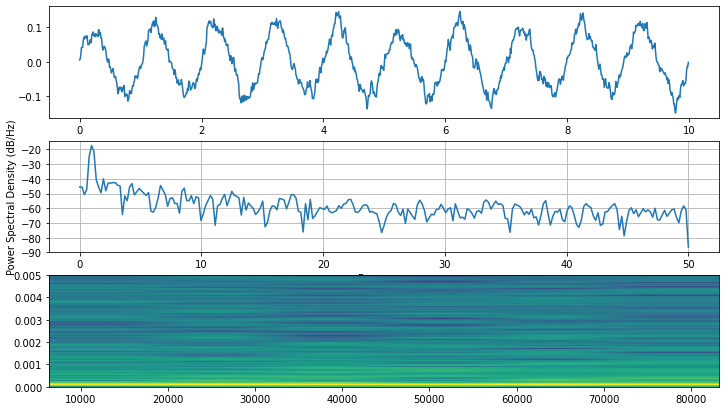

In [87]:
sampling_freq = 0.01
begin_time = 0
end_time = 10
time = np.arange(begin_time, end_time, sampling_interval)

# noise
np.random.seed(42)
random_values = np.random.randn(len(time))
exp_values = np.exp(-time / 0.05)
noise = np.convolve(random_values, exp_values) * sampling_freq
noise = noise[:len(time)]

wave_ = 0.1 * np.sin(2 * np.pi * time) + noise

fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(12,7))
ax0.plot(time, wave_)
ax1.psd(wave_, 512, 1 / sampling_freq)
ax2.specgram(wave_, Fs=sampling_freq)

plt.show()

## Example 6 - Spectogram  [7]

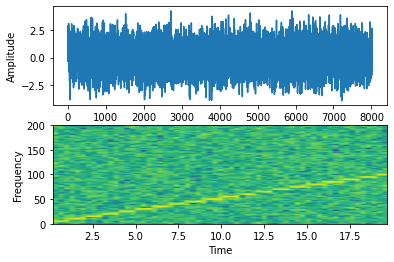

(129, 61)
[4.65115394e-03 2.30334436e-04 2.40199530e-04 2.62529327e-03
 4.42714257e-03 1.74208829e-04 5.96734856e-05 3.74071934e-04
 2.43757906e-04 1.12785127e-03]


In [88]:
# import the libraries
import matplotlib.pyplot as plot
import numpy as np

# Define the list of frequencies

frequencies= np.arange(5,105,5)

# Sampling Frequency
samplingFrequency = 400

# Create two ndarrays
s1 = np.empty([0]) # For samples
s2 = np.empty([0]) # For signal

# Start - stop Value of the sample
start   = 1
stop    = samplingFrequency+1

for frequency in frequencies:
    sub1 = np.arange(start, stop, 1)
    # Signal - Sine wave with varying frequency + Noise
    sub2 = np.sin(2*np.pi*sub1*frequency*1/samplingFrequency)+np.random.randn(len(sub1))
    s1      = np.append(s1, sub1)
    s2      = np.append(s2, sub2)
    start   = stop+1
    stop    = start+samplingFrequency

    
# Plot the signal

plot.subplot(211)
plot.plot(s1,s2)
plot.xlabel('Sample')
plot.ylabel('Amplitude')

# Plot the spectrogram

plot.subplot(212)
powerSpectrum, freqenciesFound, time, imageAxis = plot.specgram(s2, Fs=samplingFrequency)
plot.xlabel('Time')
plot.ylabel('Frequency')
plot.show() 

print(powerSpectrum.shape)
print(powerSpectrum[0][:10])

References:
    
- https://www.youtube.com/watch?v=DSz4ZILAneQ [1]
- https://www.youtube.com/watch?v=su9YSmwZmPg [2]
- https://blog.endaq.com/vibration-analysis-fft-psd-and-spectrogram [3]
-https://pythontic.com/visualization/signals/fouriertransform_fft [4]
- https://matplotlib.org/stable/gallery/lines_bars_and_markers/psd_demo.html [5]
- https://fairyonice.github.io/implement-the-spectrogram-from-scratch-in-python.html [6]
- https://pythontic.com/visualization/signals/spectrogram [7]
- https://analyticsindiamag.com/hands-on-tutorial-on-visualizing-spectrograms-in-python/